In [1]:
import plotly
import plotly.graph_objs as go
import plotly.express as px
from plotly.subplots import make_subplots
import sys
if not sys.warnoptions:
    import warnings
    warnings.simplefilter('ignore')
import pandas as pd
import sweetviz as sv
import ydata_profiling as yp

In [2]:
cities=pd.read_excel('F:/data_science_course/git/Lesson_34/city.xlsx',index_col=0)
print(cities)

              City  Metro    Population       Income        Area
0          Miskolc  False  3.136629e+06  3050.472778  258.608591
1    San Francisco  False  1.843130e+06  2621.319966  221.083004
2            Porto   True  4.334452e+06  3617.636775  369.690334
3      Jersey City  False  7.951713e+05  2796.516160  223.388132
4         San Jose  False  1.248192e+06  2915.105966  201.402372
5             Baku   True  1.417427e+06  3596.733670  173.908837
6        Barcelona   True  3.240415e+03  3436.164243  323.158900
7         Budapest   True  3.206485e+06  2774.415061  226.830015
8           Boston   True  1.317553e+06  3314.787047  183.368397
9           Madrid   True  1.931427e+06  3411.301288  170.015829
10         Seattle  False  4.662322e+06  3179.874678  269.713629
11          Malaga   True  5.710940e+05  2900.144002  190.530020
12      Minsk city   True  3.104306e+06  2949.477998  306.572556
13         Detroit  False  4.185194e+06  2892.953476  208.022701
14           Tampa  False

In [25]:
fig = go.Figure()
# fig.add_trace(go.Scatter(x=cities.Population,y=cities.Area))
fig=make_subplots(rows=1, cols=2)
fig.add_scatter(x=sorted(cities.Population),y=cities.Area, row=1,col=1)
fig.add_scatter(x=sorted(cities.Population),y=cities.Income, row=1,col=1)

In [27]:
df_corr=cities.corr()
df_corr

,Metro,Population,Income,Area
Metro,1.000000,-0.201926,0.482372,0.129653
Population,-0.201926,1.000000,-0.029368,0.023652
Income,0.482372,-0.029368,1.000000,0.113842
Area,0.129653,0.023652,0.113842,1.000000


In [28]:
fig=go.Figure()
fig.add_trace(go.Heatmap(x=df_corr.columns, y=df_corr.index, z=df_corr, colorscale= 'darkmint'))

                                             |                                                                …


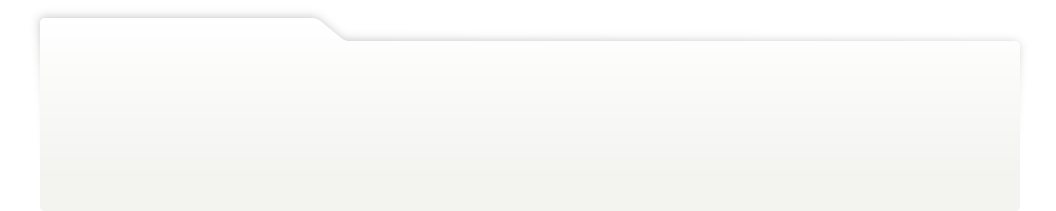
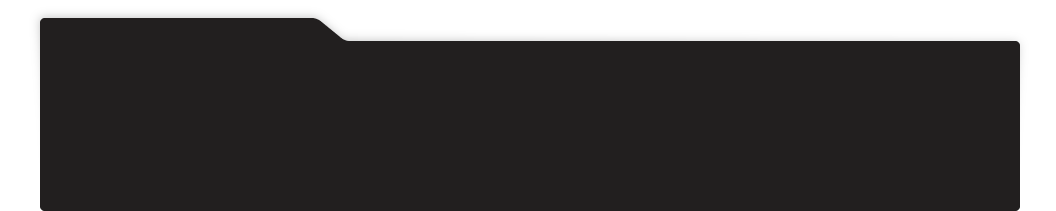
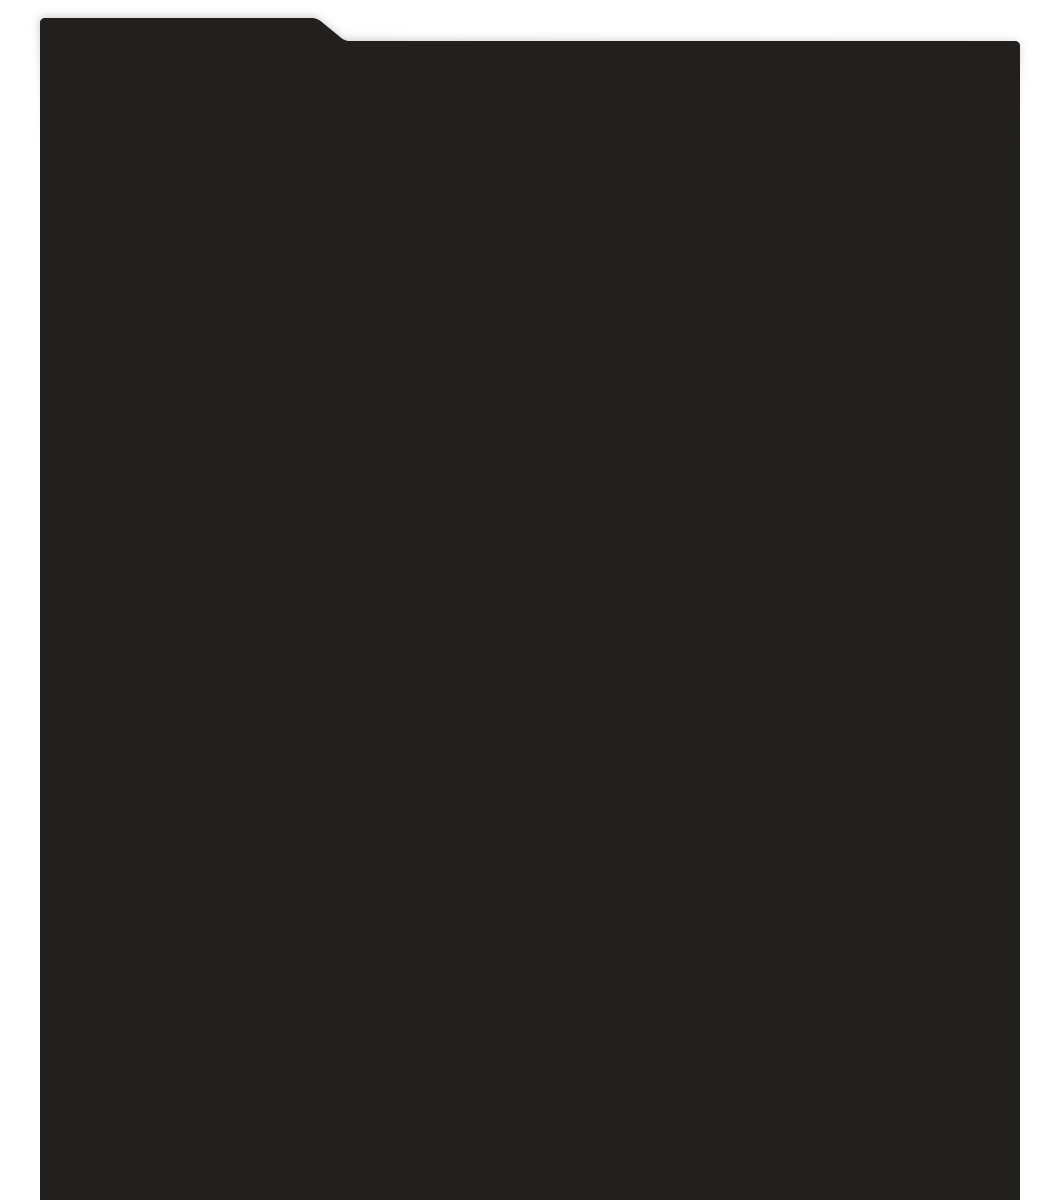
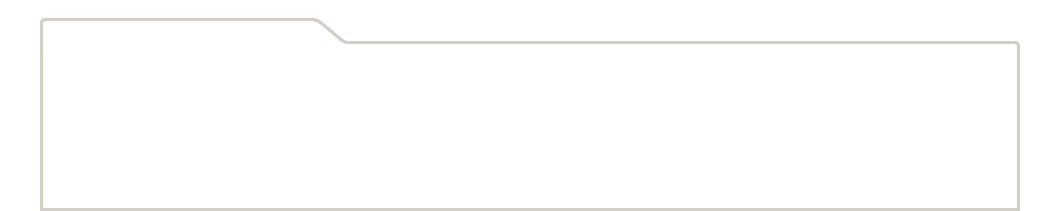
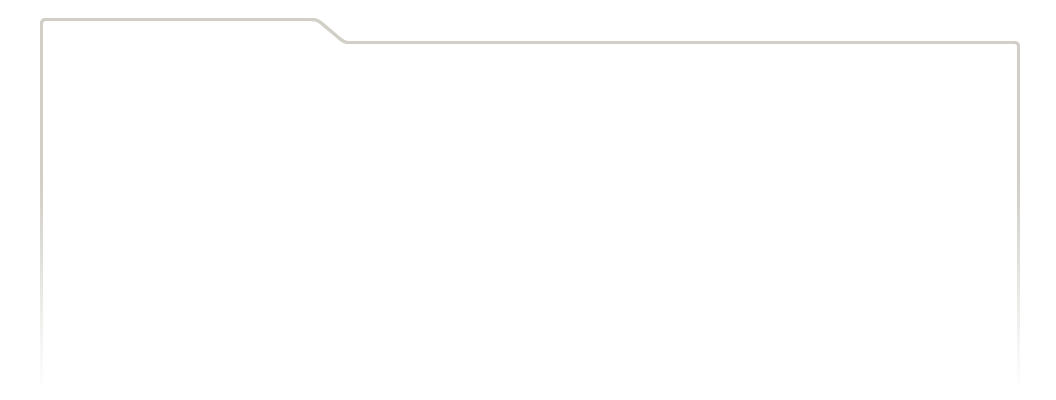
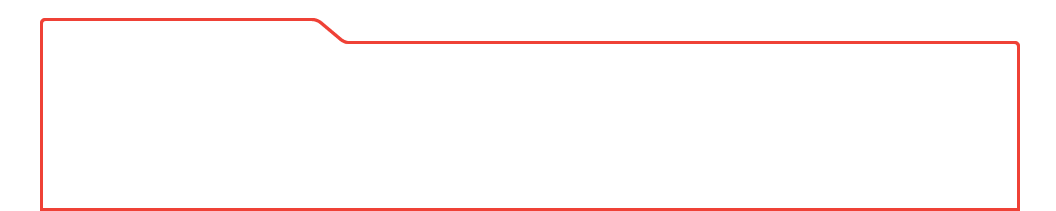
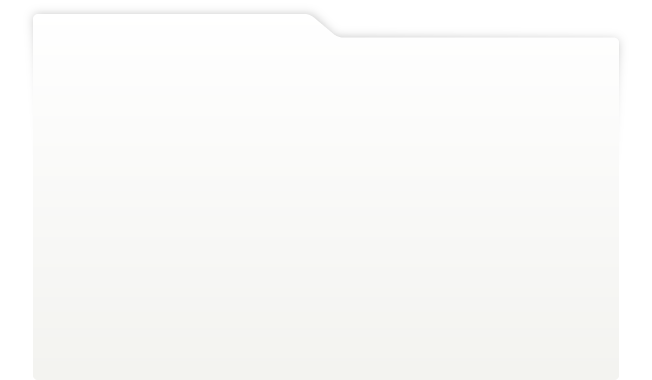
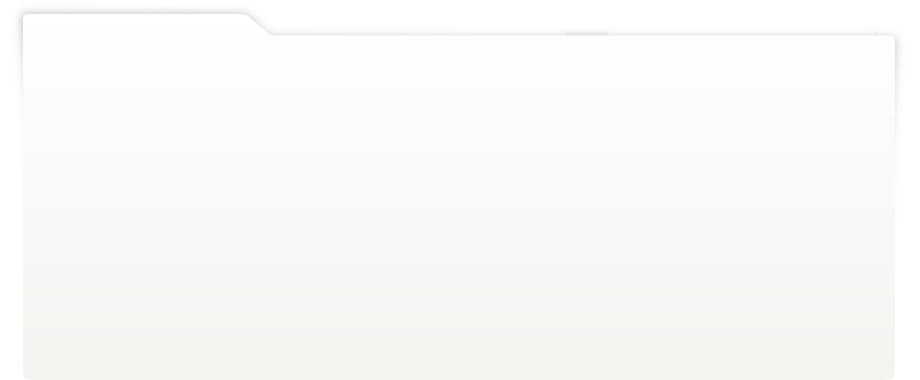
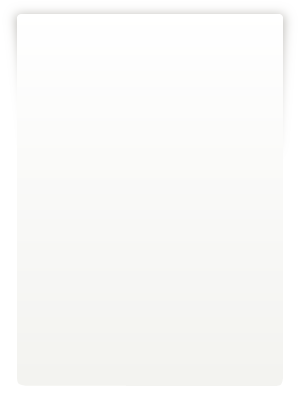
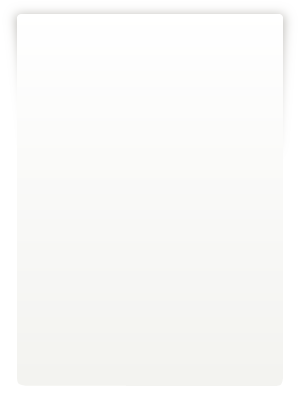
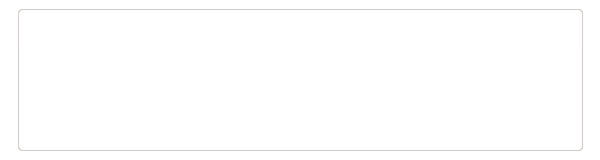
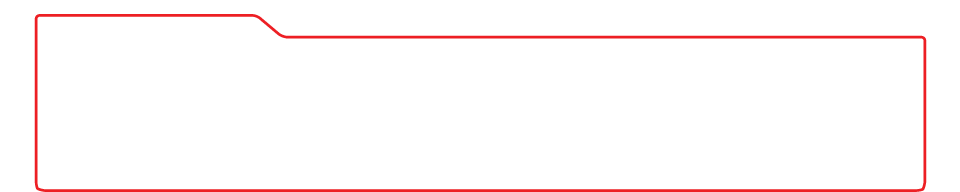
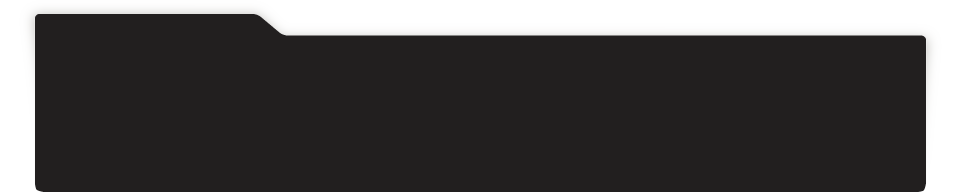
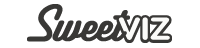
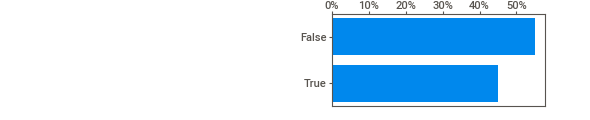
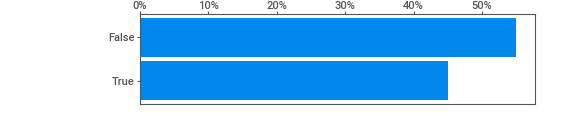
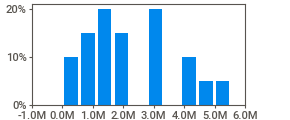
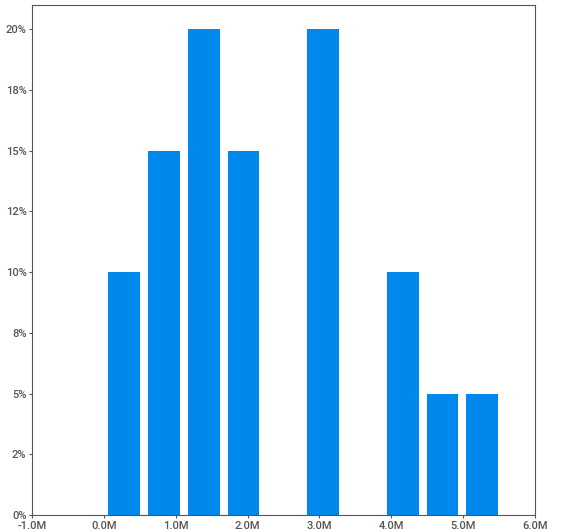
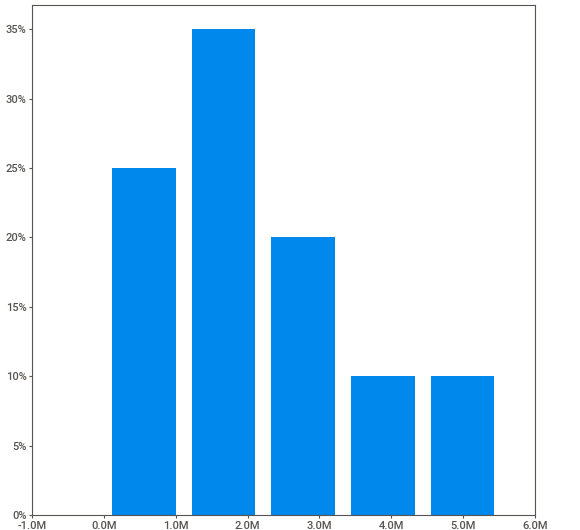
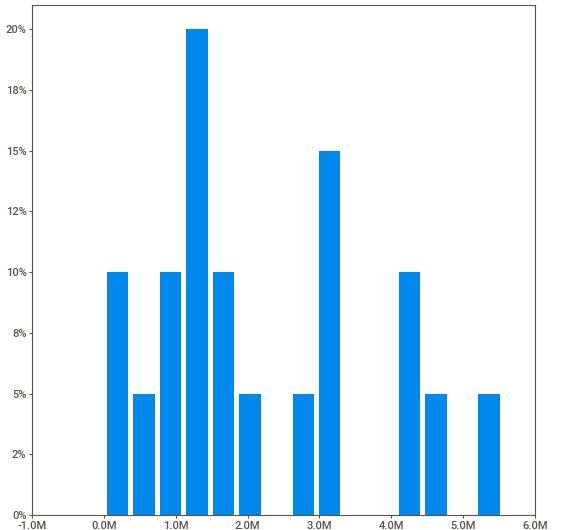
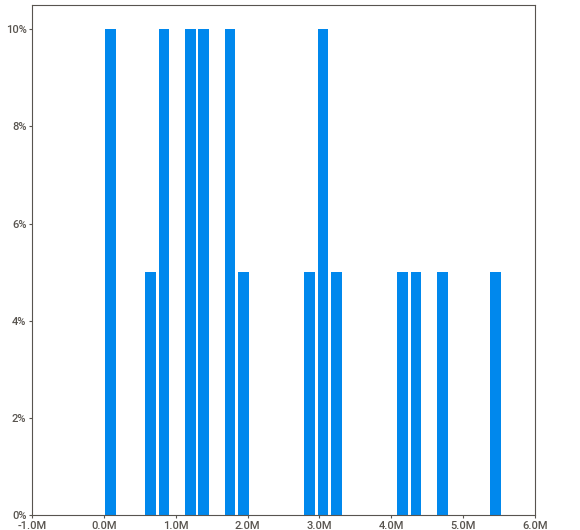
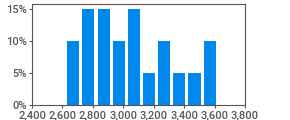
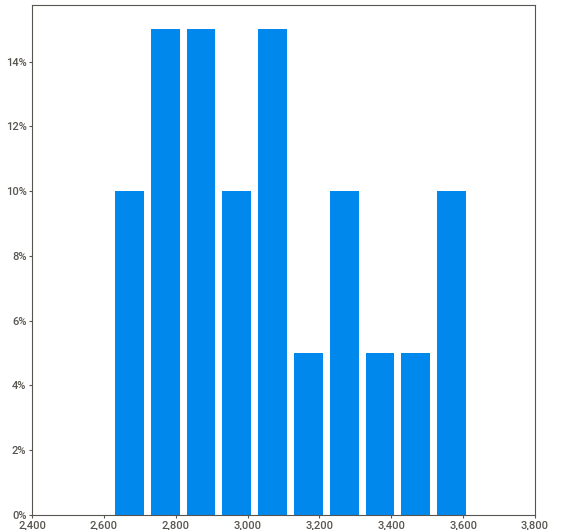
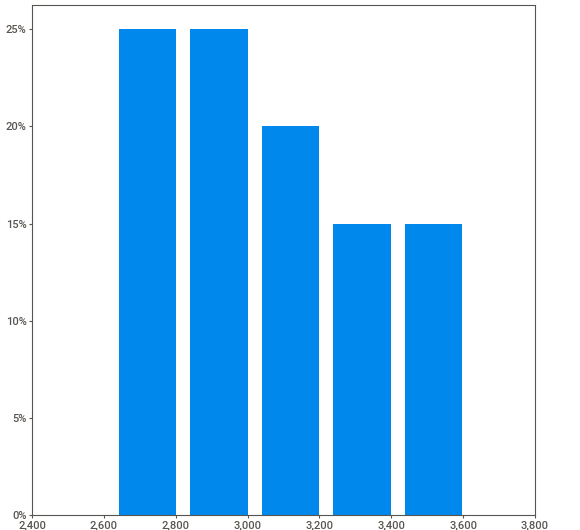
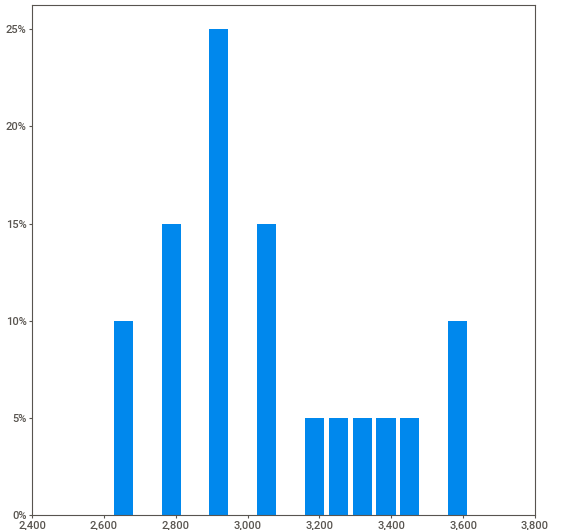
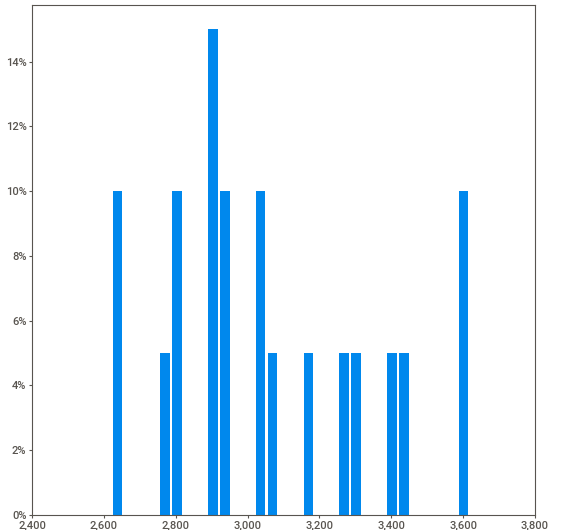
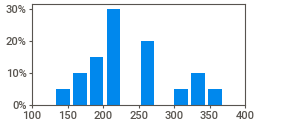
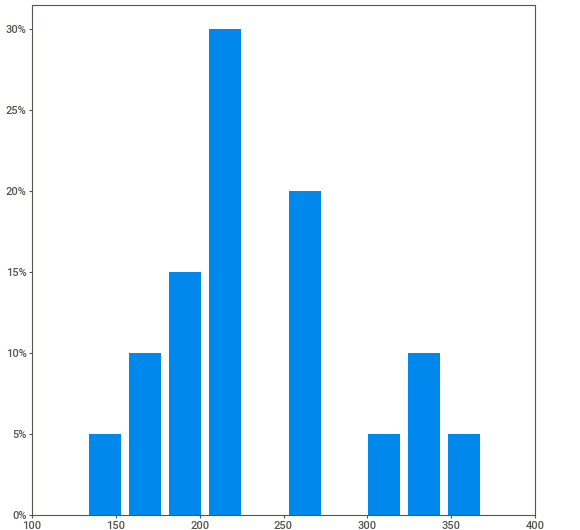
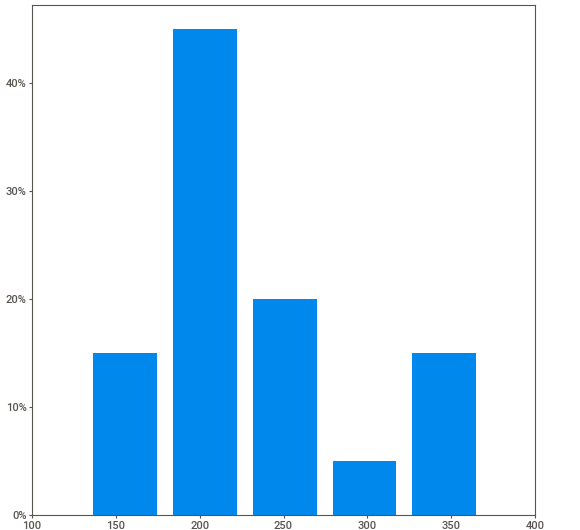
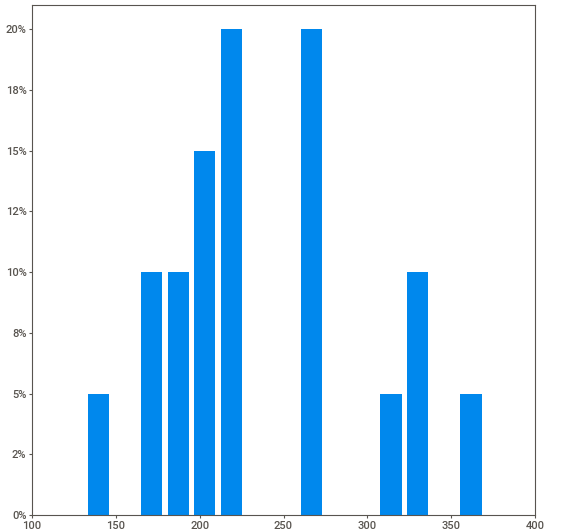
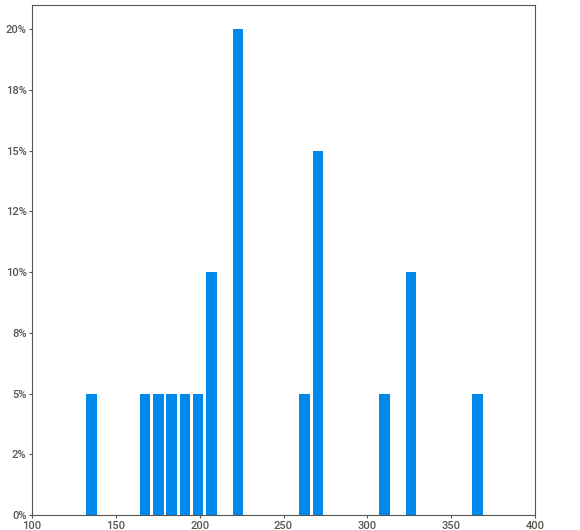
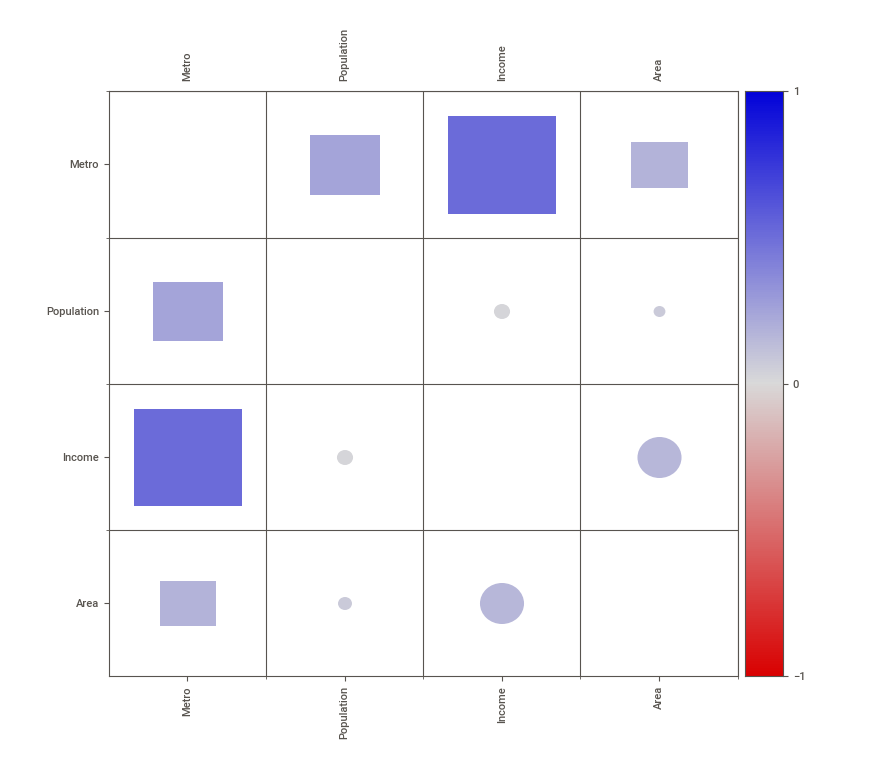
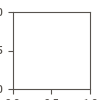

In [29]:
report = sv.analyze([cities, "cities"])
report.show_notebook()

In [31]:
yp.ProfileReport(cities)

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

Звіт ydata надає більшу гнучкість та обширність для порівняння показників данного датафрейму, аніж sweetviz тому що в данному випадку гістограмність та накопичуваність однакових параметрів не так важливі для аналізу, як порівняння разних між собою параметрів